In [23]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

In [24]:
data = pd.read_csv('decisiontree.csv')
print(data.shape)
data.head()

(158, 7)


,HAPPY/UNHAPPY,Terror Atacks,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Country
0,HAPPY,111,1.39651,0.94143,0.66557,0.41978,Switzerland
1,HAPPY,4,1.30232,0.94784,0.62877,0.14145,Iceland
2,HAPPY,41,1.32548,0.87464,0.64938,0.48357,Denmark
3,HAPPY,19,1.45900,0.88521,0.66973,0.36503,Norway
4,HAPPY,98,1.32629,0.90563,0.63297,0.32957,Canada


In [30]:
X = data.iloc[:, 1:5].values  
y = data.iloc[:, 0].values 

In [55]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)  

In [56]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [64]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [65]:
y_pred = classifier.predict(X_test)  

In [66]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[21  2]
 [ 3 22]]
             precision    recall  f1-score   support

      HAPPY       0.88      0.91      0.89        23
    UNHAPPY       0.92      0.88      0.90        25

avg / total       0.90      0.90      0.90        48



In [73]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

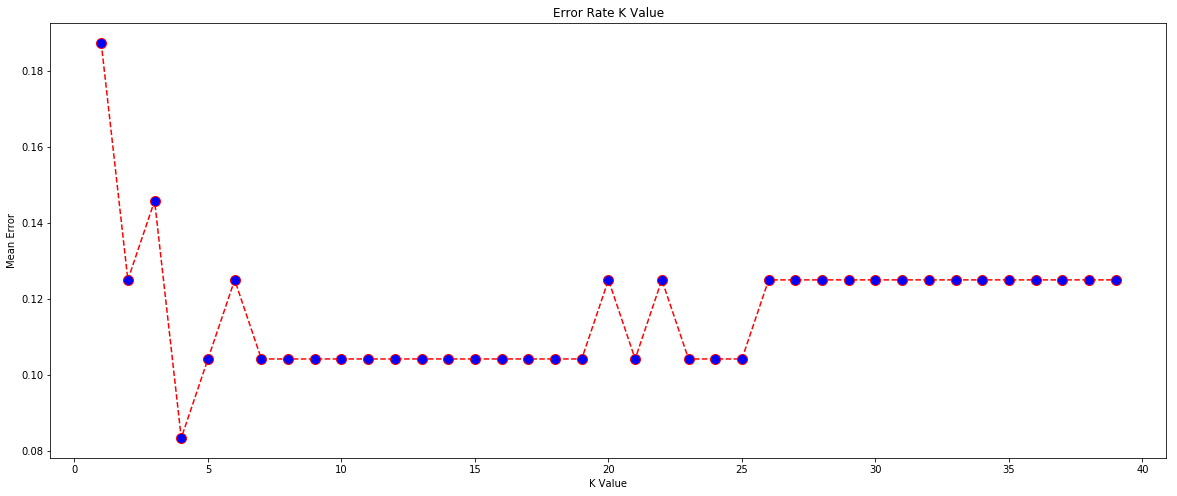

In [84]:
plt.figure(figsize=(20, 8))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()